In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sum_basketball = pd.read_csv("atusdata/atussum_2013.dat")

In [3]:
sum_basketball.columns

Index(['tucaseid', 'TUFINLWGT', 'TRYHHCHILD', 'TEAGE', 'TESEX', 'PEEDUCA',
       'PTDTRACE', 'PEHSPNON', 'GTMETSTA', 'TELFS', 
       ...
       't181501', 't181599', 't181601', 't181801', 't189999', 't500101',
       't500103', 't500105', 't500106', 't500107'],
      dtype='object', length=413)

In [4]:
sum_basketball.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181501,t181599,t181601,t181801,t189999,t500101,t500103,t500105,t500106,t500107
0,20130101130004,11899905.662034,12,22,2,40,8,2,1,5,...,0,0,0,0,0,0,0,0,0,0
1,20130101130112,4447638.009513,1,39,1,43,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20130101130123,10377056.507734,-1,47,2,40,1,2,1,4,...,25,0,0,0,0,0,0,0,0,0
3,20130101130611,7731257.992805,-1,50,2,40,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,20130101130616,4725269.227067,-1,45,2,40,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
sum_basketball["t130103"].sum() #participating in basketball

6974

In [7]:
sum_basketball["t130203"].sum() #Attending in basketball

2156

In [8]:
adults_crit = sum_basketball.TEAGE >= 18
no_children_crit = sum_basketball.TRCHILDNUM == 0
with_children_CRIT = sum_basketball.TRCHILDNUM > 0
non_zero_part_crit = sum_basketball.t130103 > 0
non_zero_attend_crit = sum_basketball.t130203 > 0
female = sum_basketball.TESEX == 2
male = sum_basketball.TESEX == 1

In [9]:
non_zero_part = sum_basketball[non_zero_part_crit]

In [10]:
non_zero_attend = sum_basketball[non_zero_attend_crit]

In [11]:
female_info = sum_basketball[female]
male_info = sum_basketball[male]
data_basketball_female = female_info[['TUFINLWGT', 't130103']]
data_basketball_male = male_info[['TUFINLWGT', 't130103']]
data_basketball_female_att = female_info[['TUFINLWGT', 't130203']]
data_basketball_male_att = male_info[['TUFINLWGT', 't130203']]
data_basketball_female = data_basketball_female.rename(columns={"TUFINLWGT": "weight", "t130103": "minutes"})
data_basketball_male = data_basketball_male.rename(columns={"TUFINLWGT": "weight", "t130103": "minutes"})
data_basketball_female_att = data_basketball_female_att.rename(columns={"TUFINLWGT": "weight", "t130203": "minutes"})
data_basketball_male_att = data_basketball_male_att.rename(columns={"TUFINLWGT": "weight", "t130203": "minutes"})
data_basketball_female['weighted_minutes_female'] = data_basketball_female.weight * data_basketball_female.minutes
data_basketball_male['weighted_minutes_male'] = data_basketball_male.weight * data_basketball_male.minutes
data_basketball_female_att['weighted_minutes_female_att'] = data_basketball_female_att.weight * data_basketball_female_att.minutes
data_basketball_male_att['weighted_minutes_male_att'] = data_basketball_male_att.weight * data_basketball_male_att.minutes

In [12]:
data_basketball_part = non_zero_part[['TUFINLWGT', 't130103']]
data_basketball_part = data_basketball_part.rename(columns={"TUFINLWGT": "weight", "t130103": "minutes"})

In [13]:
data_basketball_attend = non_zero_attend[['TUFINLWGT', 't130203']]
data_basketball_attend = data_basketball_attend.rename(columns={"TUFINLWGT": "weight", "t130203": "minutes"})

In [14]:
data_basketball_part['weighted_minutes_part'] = data_basketball_part.weight * data_basketball_part.minutes
data_basketball_attend['weighted_minutes_attend'] = data_basketball_attend.weight * data_basketball_attend.minutes

In [15]:
data_basketball_part.weighted_minutes_part.sum() / data_basketball_part.weight.sum()

119.27091479886502

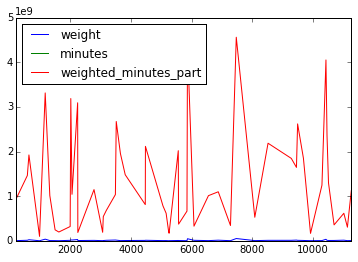

In [22]:
data_basketball_part.plot()

In [16]:
data_basketball_attend.weighted_minutes_attend.sum() / data_basketball_attend.weight.sum()

145.61568825636056

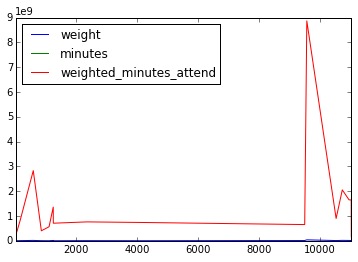

In [23]:
data_basketball_attend.plot()

In [17]:
data_basketball_female.weighted_minutes_female.sum() / data_basketball_female.weight.sum()

0.22719976391626481

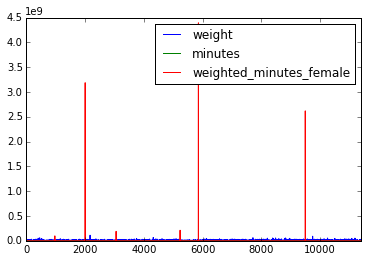

In [24]:
data_basketball_female.plot()

In [18]:
data_basketball_male.weighted_minutes_male.sum() / data_basketball_male.weight.sum()

1.3098680282058712

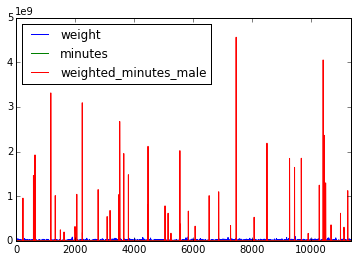

In [25]:
data_basketball_male.plot()

In [19]:
data_basketball_female_att.weighted_minutes_female_att.sum() / data_basketball_female_att.weight.sum()

0.35992336325468571

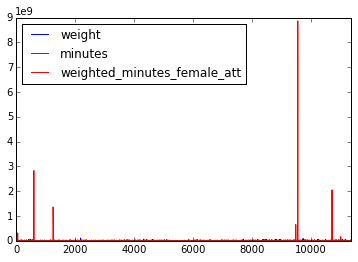

In [26]:
data_basketball_female_att.plot()

In [27]:
data_basketball_male_att.weighted_minutes_male_att.sum() / data_basketball_male_att.weight.sum()

0.1700180646454573

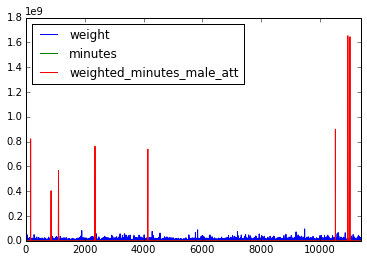

In [28]:
data_basketball_male_att.plot()

In [21]:
#Questions/Answers:
#1)  How long do people participate in basketball on average?  119.27091479886502
#2)  How long do people attend basketball on average?  145.61568825636056
#3)  Do people participate in basketball as much as they attend the games?  They attend games more than they 
#    participate but the numbers aren't that far off.  The difference is greater than football though.
#4)  Do females participate in basketball like males do?  0.22719976391626481 on average.  They don't 
#    seem to participate nearly as much as males do.  Males participate at 1.3098680282058712 on average.
# NOTE:  I was unable to find out how to filter down to only have nonzero entries as part of this calculation.
#5)  Do females attend basketball like males to?  I was very surprised to find out that they do attend games more 
#    than males do.  Females = 0.35992336325468571 on average and males = 0.1700180646454573 on average.
# NOTE:  I was unable to find out how to filter down to only have nonzero entries as part of this calculation.
#FINAL RESULTS:  I was very surprised to see that females don't play basketball as much as males do but they
#               attend games more.